In [1]:
#import libaries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#avoid warnings
import warnings
warnings.filterwarnings("ignore")

dataset link: https://www.kaggle.com/datasets/johnsmith88/heart-disease-dataset

In [2]:
#import dataset

dataset = pd.read_csv(r"D:\MACHINE LEARNING\FINAL PROJECT\Dataset\health\heart.csv")

In [3]:
#read dataset

dataset.tail()   

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1
1024,54,1,0,120,188,0,1,113,0,1.4,1,1,3,0


# understanding dataset

In [4]:
#shape of dataset

dataset.shape

(1025, 14)

In [5]:
#information about dataset

dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [6]:
#describe about dataset

dataset.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


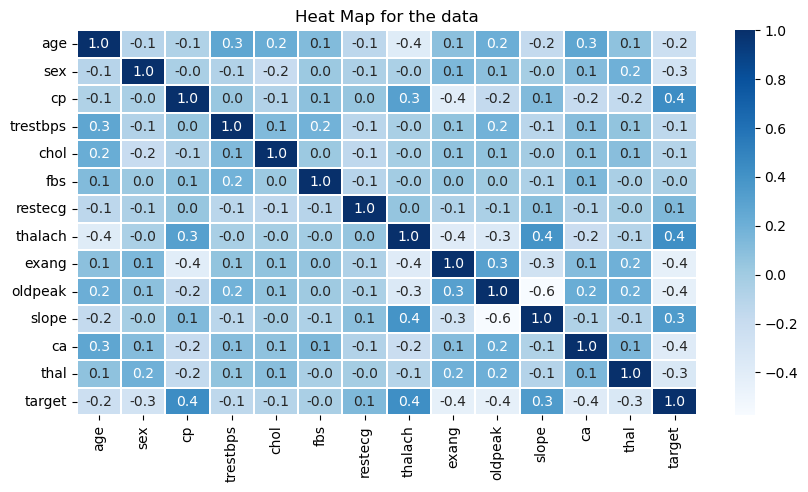

In [7]:
#understanding data

corr= dataset.corr()

plt.subplots(figsize=(10,5))
sns.heatmap(corr,cbar=True,linewidth=.2,annot=True,fmt=".1f",cmap="Blues")
plt.title("Heat Map for the data")
plt.show()

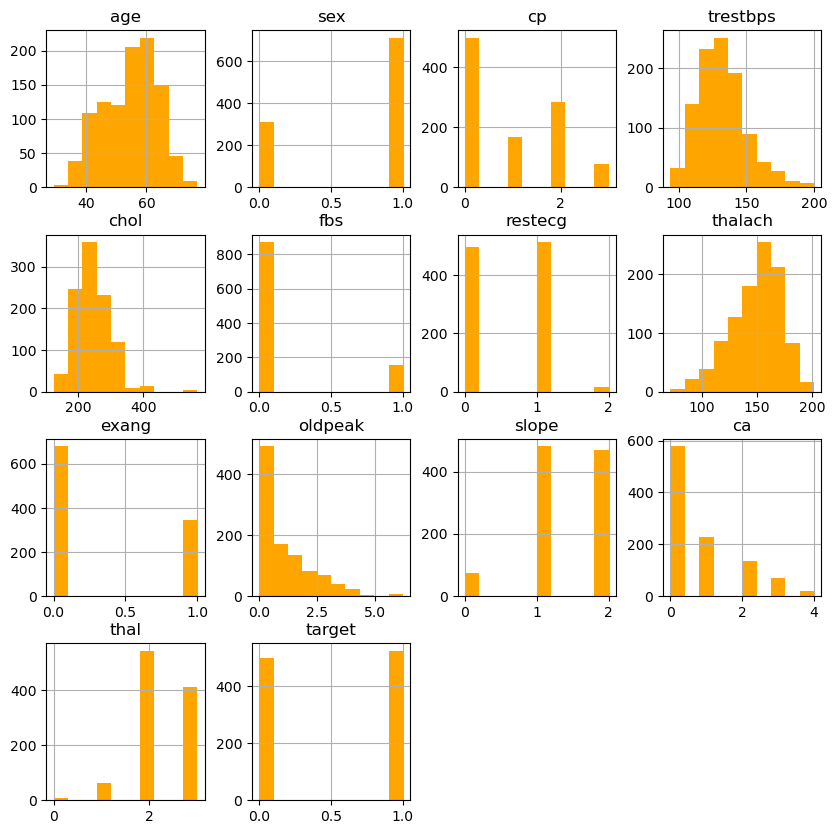

In [8]:
#understanding dataset

dataset.hist(figsize=(10,10),color="orange")
plt.show()

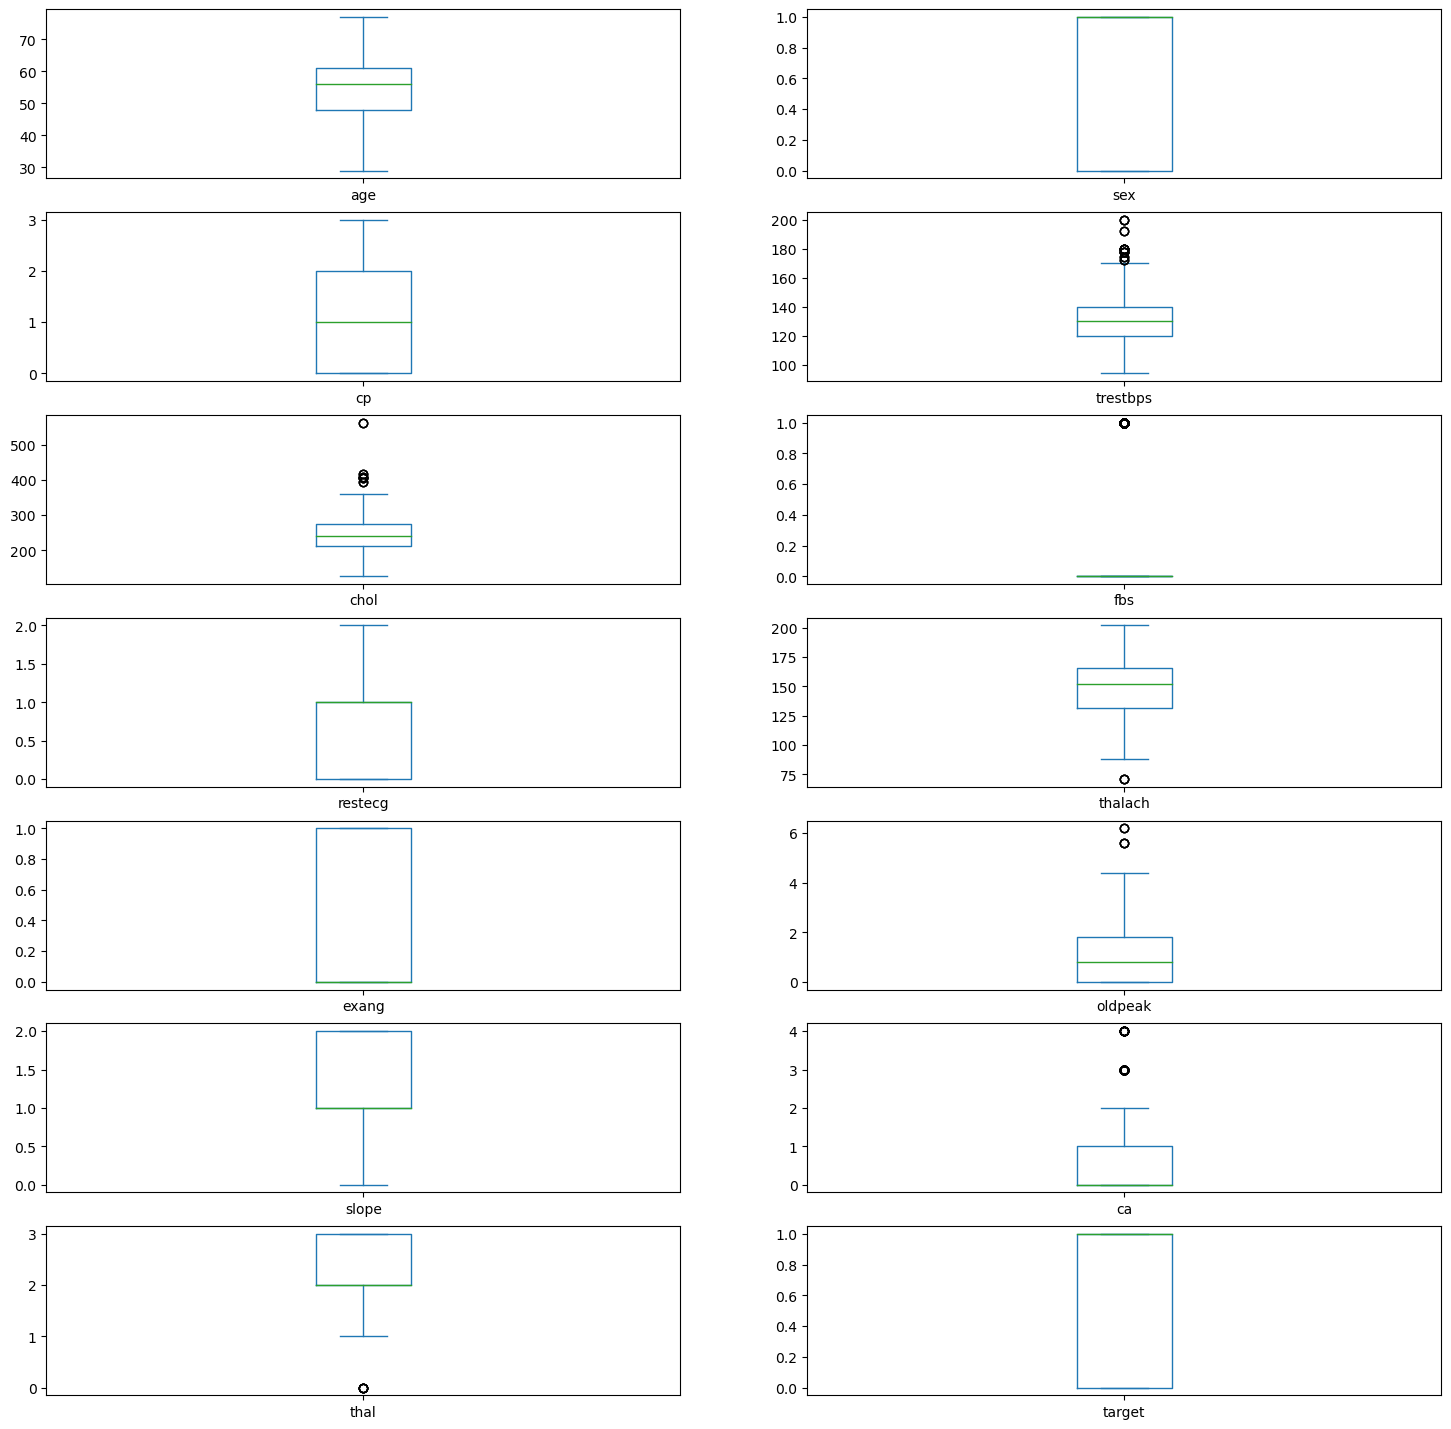

In [9]:
dataset.plot(kind="box",subplots=True,sharex=False,figsize=(18,18),layout=(7,2))
plt.show()

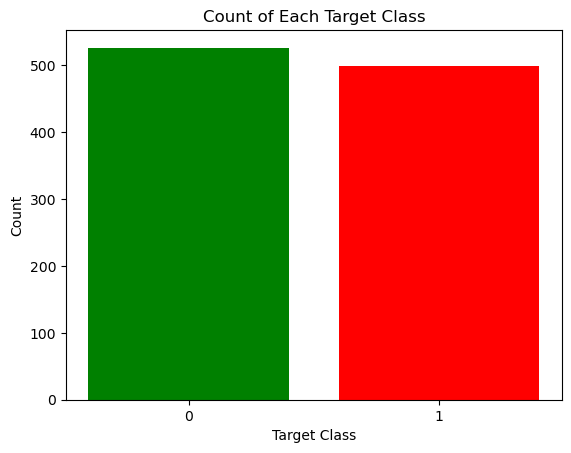

In [10]:
#bar plot for target class

plt.bar(dataset["target"].unique(),dataset["target"].value_counts(),color=["green","red"])
plt.xlabel("Target Class")
plt.xticks([0,1])
plt.ylabel("Count")
plt.title("Count of Each Target Class")
plt.show()

# data processing

In [11]:
#import libiary
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report

In [12]:
cols = ['cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang']       
x=dataset[cols]
y=dataset.target

In [23]:
#StandardScaler

Scaler=StandardScaler()
X=Scaler.fit_transform(x)

In [24]:
#split training and testing data
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=.25,random_state=42)

# machine learning model selection

LogisticRegression

In [25]:
from sklearn.linear_model import LogisticRegression
model1 = LogisticRegression()

model1.fit(x_train,y_train)

x_train_pred = model1.predict(x_train)
training_data_Accuracy = accuracy_score(x_train_pred,y_train)
print("Accuracy on Training data: ",training_data_Accuracy*100 )

x_test_pred = model1.predict(x_test)
testing_data_Accuracy = accuracy_score(x_test_pred,y_test)
print("Accuracy on Testing data: ",testing_data_Accuracy*100 )
print()
print(classification_report(y_test,x_test_pred))

Accuracy on Training data:  77.734375
Accuracy on Testing data:  77.431906614786

              precision    recall  f1-score   support

           0       0.82      0.71      0.76       132
           1       0.73      0.84      0.78       125

    accuracy                           0.77       257
   macro avg       0.78      0.78      0.77       257
weighted avg       0.78      0.77      0.77       257



In [26]:
from sklearn.svm import SVC

model2=SVC()

model2.fit(x_train,y_train)

x_train_pred = model2.predict(x_train)
training_data_Accuracy = accuracy_score(x_train_pred,y_train)
print("Accuracy on Training data: ",training_data_Accuracy*100 )

x_test_pred = model2.predict(x_test)
testing_data_Accuracy = accuracy_score(x_test_pred,y_test)
print("Accuracy on Testing data: ",testing_data_Accuracy*100 )
print()
print(classification_report(y_test,x_test_pred))

Accuracy on Training data:  82.29166666666666
Accuracy on Testing data:  78.21011673151752

              precision    recall  f1-score   support

           0       0.83      0.72      0.77       132
           1       0.74      0.85      0.79       125

    accuracy                           0.78       257
   macro avg       0.79      0.78      0.78       257
weighted avg       0.79      0.78      0.78       257



In [27]:
from sklearn.ensemble import RandomForestClassifier
model3=RandomForestClassifier()

model3.fit(x_train,y_train)

x_train_pred = model3.predict(x_train)
training_data_Accuracy = accuracy_score(x_train_pred,y_train)
print("Accuracy on Training data: ",training_data_Accuracy*100 )

x_test_pred = model3.predict(x_test)
testing_data_Accuracy = accuracy_score(x_test_pred,y_test)
print("Accuracy on Testing data: ",testing_data_Accuracy*100 )
print()
print(classification_report(y_test,x_test_pred))

Accuracy on Training data:  100.0
Accuracy on Testing data:  98.83268482490273

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       132
           1       1.00      0.98      0.99       125

    accuracy                           0.99       257
   macro avg       0.99      0.99      0.99       257
weighted avg       0.99      0.99      0.99       257



In [28]:
from sklearn.naive_bayes import GaussianNB
model4=GaussianNB()

model4.fit(x_train,y_train)

x_train_pred = model4.predict(x_train)
training_data_Accuracy = accuracy_score(x_train_pred,y_train)
print("Accuracy on Training data: ",training_data_Accuracy*100 )

x_test_pred = model4.predict(x_test)
testing_data_Accuracy = accuracy_score(x_test_pred,y_test)
print("Accuracy on Testing data: ",testing_data_Accuracy*100 )
print()
print(classification_report(y_test,x_test_pred))

Accuracy on Training data:  74.86979166666666
Accuracy on Testing data:  75.87548638132296

              precision    recall  f1-score   support

           0       0.81      0.70      0.75       132
           1       0.72      0.82      0.77       125

    accuracy                           0.76       257
   macro avg       0.76      0.76      0.76       257
weighted avg       0.76      0.76      0.76       257



<h4>comparely, RandomForstClassifier give high Accuracy<h4>

In [35]:
#predication


#input_Data = [1,140,221,0,1,164,1] #1  
input_Data =  [0,125,258,0,0,141,1] #0
input_data_to_array = np.asarray(input_Data)

input_Data_reshaped = input_data_to_array.reshape(1,-1)

std  = Scaler.transform(input_Data_reshaped)

predication = model3.predict(std)

print(predication)

if predication[0] == 0:
    print("The person does not have a Heart Disease")
    
else:
    print("The person hes Heart Disease")

[0]
The person does not have a Heart Disease


In [36]:
#save the model

#location => D:\MACHINE LEARNING\FINAL PROJECT\Models\health\

import joblib

joblib.dump(model3,r"D:\MACHINE LEARNING\FINAL PROJECT\Models\health\heartDisease_model.pkl")

['D:\\MACHINE LEARNING\\FINAL PROJECT\\Models\\health\\heartDisease_model.pkl']

In [37]:
#load model

load_model = joblib.load(r"D:\MACHINE LEARNING\FINAL PROJECT\Models\health\heartDisease_model.pkl")

#predication
#input_Data = [1,140,221,0,1,164,1] #1  
input_Data =  [0,125,258,0,0,141,1] #0
input_data_to_array = np.asarray(input_Data)

input_Data_reshaped = input_data_to_array.reshape(1,-1)

std  = Scaler.transform(input_Data_reshaped)

predication = load_model.predict(std)

print(predication)

if predication[0] == 0:
    print("The person does not have a Heart Disease")
    
else:
    print("The person hes Heart Disease")

[0]
The person does not have a Heart Disease


# Working Sucessfully